# Predicting Airline Delays
## Part 1: Preparing Data for Analysis
In this part, we will clean the data and visualize some of the graphs

In [1]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
path=r'C:\Users\antho\Documents\airline-delay-master'
flt2016 = pd.read_csv(path+r'\airline_data.csv')

NameError: name 'ListedColormap' is not defined

In [3]:
######################################
######################################
# Remove border function taken from CS109 2013 
######################################
def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecessary plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

This dataset is massive. Let's look at the first 5 rows to determine the columns.

In [4]:
flt2016.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6.873482e+06,7.009728e+06,6.858079e+06,7.009728e+06,7.009728e+06,6.855029e+06,7.008884e+06,6.855029e+06,6.855029e+06,6.873482e+06,7.009728e+06,6.858079e+06,6.872670e+06,7.009728e+06,7.009728e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,1.333830e+03,1.326086e+03,1.481258e+03,1.494801e+03,2.224200e+03,1.273224e+02,1.288668e+02,1.040186e+02,8.168452e+00,9.972570e+00,7.263870e+02,6.860852e+00,1.645305e+01,1.960618e-02,2.463006e-03,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,4.780689e+02,4.642509e+02,5.052251e+02,4.826728e+02,1.961716e+03,7.018731e+01,6.940974e+01,6.743980e+01,3.850194e+01,3.531127e+01,5.621018e+02,4.933649e+00,1.133280e+01,1.386426e-01,4.956753e-02,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,-1.410000e+02,0.000000e+00,-5.190000e+02,-5.340000e+02,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,8.000000e+01,5.500000e+01,-1.000000e+01,-4.000000e+00,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.100000e+02,1.100000e+02,8.600000e+01,-2.000000e+00,-1.000000e+00,5.810000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.907000e+03,3.518000e+03,1.570000e+02,1.590000e+02,1.320000e+02,1.200000e+01,8.000000e+00,9.540000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,1.435000e+03,1.350000e+03,2.461000e+03,2.467000e+03,4.962000e+03,3.080000e+02,4.290000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


Alternatively, we could do use the DataFrame.info() to check the columns. See below:

In [5]:
flt2016.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


Lets see where the no-values or NaNs are located and clean them up. Let's remove rows with NaNs.

In [6]:
flt2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [7]:
data_total_rows = len(flt2016)
flt2016.dropna(subset = ['UniqueCarrier','Origin','Dest','CRSDepTime','CRSArrTime','ArrDelay','CRSElapsedTime','Distance'],inplace=True)

In [8]:
df_data_retained = len(flt2016)/data_total_rows * 100
print('Data retained: '+ str(df_data_retained)+' %')

Data retained: 0 %


In [9]:
flt2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6855029 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


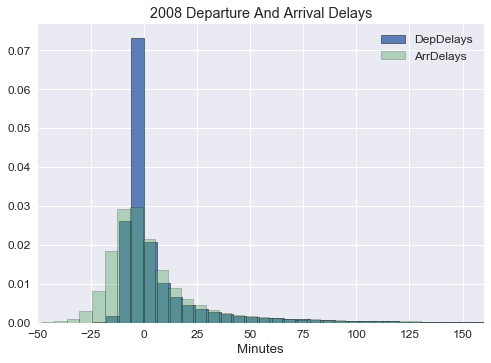

In [10]:
##### plot departure delays
sns.set_context('notebook',font_scale=1.2)
g = sns.distplot(a=flt2016['DepDelay'],bins=500,kde=False,norm_hist=True,
                 hist_kws={'alpha':0.9,'linewidth':.5,'edgecolor':'k','label':'DepDelays'})
sns.distplot(a=flt2016['ArrDelay'],bins=500,kde=False,norm_hist=True,
                 hist_kws={'alpha':0.4,'linewidth':.5,'edgecolor':'k','label':'ArrDelays'})
g.set(xlim=(-50,160))
g.set(xlabel='Minutes')
g.legend()
g.set(title='2008 Departure And Arrival Delays')

In [11]:
# calculate mean Arrive and Departure Delays
# Use value counts to get the top 10 airlines that were displayed
top10carriers = flt2016['UniqueCarrier'].value_counts().head(10).index

In [12]:
# read full name of the airlines
carrier_key = pd.read_csv('L_UNIQUE_CARRIERS.csv')
carrier_key.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [13]:
flt2016UC = flt2016[flt2016['UniqueCarrier'].isin(top10carriers)][['UniqueCarrier','ArrDelay','DepDelay','Origin','Dest']]

In [14]:
flt2016FN = pd.merge(left=flt2016UC,right=carrier_key,how='left',left_on='UniqueCarrier',right_on='Code')
flt2016FN.head(5)

,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,Code,Description
0,WN,-14.0,8.0,IAD,TPA,WN,Southwest Airlines
1,WN,2.0,19.0,IAD,TPA,WN,Southwest Airlines
2,WN,14.0,8.0,IND,BWI,WN,Southwest Airlines
3,WN,-6.0,-4.0,IND,BWI,WN,Southwest Airlines
4,WN,34.0,34.0,IND,BWI,WN,Southwest Airlines


In [15]:
flt2016temp = flt2016FN.copy()

In [16]:
# greater than 30 minutees late and early are changed to 30 minutes to keep data on same scale
flt2016temp['ArrDelay'] = flt2016temp['ArrDelay'].apply(lambda x:30 if x>=30 else x )
flt2016temp['ArrDelay'] = flt2016temp['ArrDelay'].apply(lambda x:-30 if x<=-30 else x)

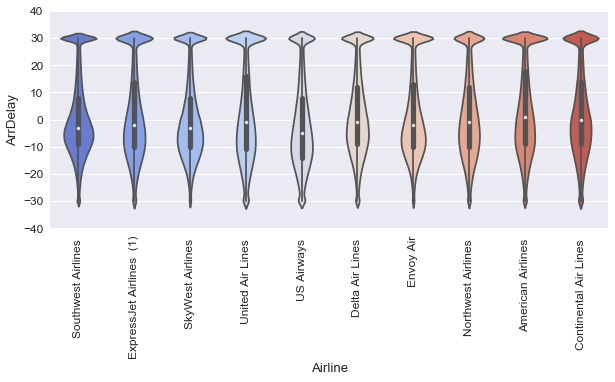

In [17]:
# show violin plot
sns.set_context('notebook',font_scale=1.2)
plt.figure(figsize=(10,4))
g = sns.violinplot(x='Description',y='ArrDelay',data=flt2016temp,palette='coolwarm')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_ylim(-40,40)
g.set_xlabel(xlabel='Airline')

Percentage of flights delayed 30 minutes or more

In [18]:
flt2016CD = pd.DataFrame()
for name in list(flt2016FN['UniqueCarrier'].unique()):
    perc_delay = len(flt2016FN[(flt2016FN['UniqueCarrier']==name) & (flt2016FN['ArrDelay']>=30)].index) / len(flt2016FN[flt2016FN['UniqueCarrier']==name].index) * 100
    flt2016CD = flt2016CD.append({'UniqueCarrier':name, 'percent_delayed':perc_delay},ignore_index=True)

In [19]:
flt2016CD = pd.merge(left=flt2016CD,right=carrier_key,how='left',left_on='UniqueCarrier',right_on='Code')
flt2016CD.head()

,UniqueCarrier,percent_delayed,Code,Description
0,WN,0.0,WN,Southwest Airlines
1,XE,0.0,XE,ExpressJet Airlines (1)
2,OO,0.0,OO,SkyWest Airlines
3,UA,0.0,UA,United Air Lines
4,US,0.0,US,US Airways


In [20]:
flt2016CD.drop(labels='UniqueCarrier',axis=1,inplace=True)

In [21]:
flt2016CD.sort(columns='percent_delayed',ascending=False,inplace=True)
flt2016CD.head()

C:\Users\antho\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,percent_delayed,Code,Description
0,0.0,WN,Southwest Airlines
1,0.0,XE,ExpressJet Airlines (1)
2,0.0,OO,SkyWest Airlines
3,0.0,UA,United Air Lines
4,0.0,US,US Airways


In [22]:
flt2016CD.rename(columns={'Description':'Airline'},inplace=True)
flt2016CD.head()

,percent_delayed,Code,Airline
0,0.0,WN,Southwest Airlines
1,0.0,XE,ExpressJet Airlines (1)
2,0.0,OO,SkyWest Airlines
3,0.0,UA,United Air Lines
4,0.0,US,US Airways


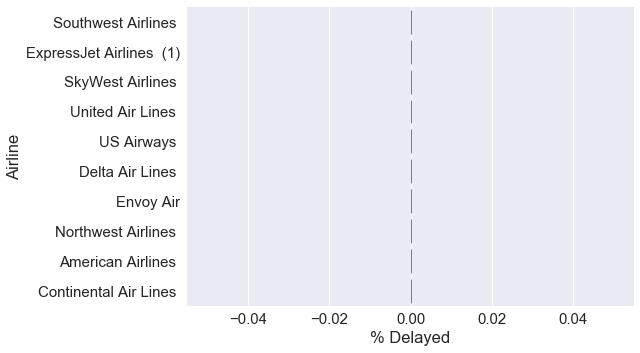

In [23]:
sns.set_context('notebook',font_scale=1.5)
color_pal=sns.color_palette(palette='OrRd_r',n_colors=len(flt2016CD.index))
g = sns.barplot(x='percent_delayed',y='Airline',data=flt2016CD,palette=color_pal,edgecolor='black',linewidth=0.5)
g.set_xlabel(xlabel='% Delayed')

Delays by month

In [24]:
flt2016.info()
flt2016CP = flt2016.copy()
flt2016CP.drop(labels=['FlightNum','TailNum','ActualElapsedTime','TaxiIn','TaxiOut','Cancelled',
                       'CancellationCode','Diverted','LateAircraftDelay'],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6855029 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [25]:
month_Arrdelay = pd.DataFrame()
m_names = 'January','February','March','April','May','June','July','August','September','October','November','December'

for m in list(flt2016CP['Month'].unique()):
    delay_mean = flt2016CP[flt2016CP['Month']==m]['ArrDelay'].mean(axis=0)
    month_Arrdelay = month_Arrdelay.append({'Month':m_names[m-1], 'Delay':delay_mean},ignore_index=True)


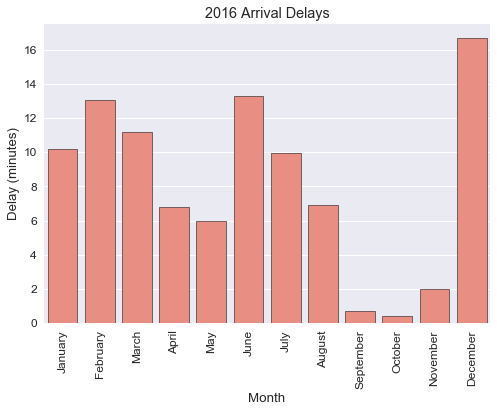

In [26]:
sns.set_context(context='notebook',font_scale=1.2)
g=sns.barplot(x='Month',y='Delay',data=month_Arrdelay,color='salmon',edgecolor='black',linewidth=0.5)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_ylabel('Delay (minutes)')
plt.title('2016 Arrival Delays')

In [27]:
month_Depdelay = pd.DataFrame()
m_names = 'January','February','March','April','May','June','July','August','September','October','November','December'

for m in list(flt2016CP['Month'].unique()):
    delay_mean = flt2016CP[flt2016CP['Month']==m]['DepDelay'].mean(axis=0)
    month_Depdelay = month_Depdelay.append({'Month':m_names[m-1], 'Delay':delay_mean},ignore_index=True)


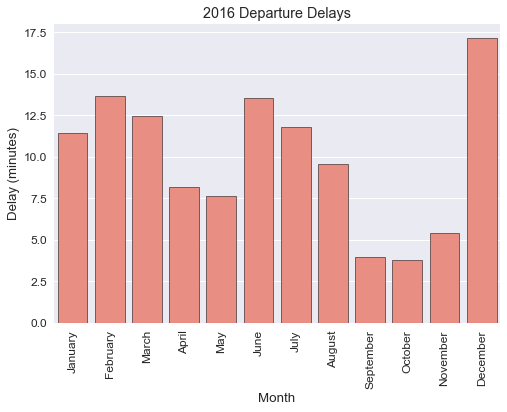

In [28]:
sns.set_context(context='notebook',font_scale=1.2)
g=sns.barplot(x='Month',y='Delay',data=month_Depdelay,color='salmon',edgecolor='black',linewidth=0.5)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_ylabel('Delay (minutes)')
plt.title('2016 Departure Delays')

Departure delays at the major cities by month - **This is also the long way to do it**

**This is the easiest way to do it!!**

In [29]:
# Let us focus on major airports only - ORD, BOS, SFO and LGA
# for 2008
flt2016ORD = flt2016CP[(flt2016CP['Origin'] == 'ORD') | (flt2016CP['Dest']=='ORD')]
flt2016BOS = flt2016CP[(flt2016CP['Origin'] == 'BOS') | (flt2016CP['Dest']=='BOS')]
flt2016SFO = flt2016CP[(flt2016CP['Origin'] == 'SFO') | (flt2016CP['Dest']=='SFO')]
flt2016LGA = flt2016CP[(flt2016CP['Origin'] == 'LGA') | (flt2016CP['Dest']=='LGA')]

In [30]:
flt2016ORD.head(2).T

,94059,102746
Year,2008,2008
Month,1,1
DayofMonth,8,25
DayOfWeek,2,5
DepTime,1711,1813
CRSDepTime,1600,1742
ArrTime,2031,2040
CRSArrTime,1945,2004
UniqueCarrier,XE,XE
CRSElapsedTime,165,82


In [31]:
flt2016ORD[['Month','DepDelay']].groupby(by='Month').mean().reset_index().DepDelay

0     27.146565
1     28.316219
2     19.577626
3     14.475421
4     12.085624
5     24.961450
6     15.545762
7     10.956220
8      9.643021
9      4.818503
10     6.815212
11    27.155092
Name: DepDelay, dtype: float64

C:\Users\antho\Anaconda2\lib\site-packages\seaborn\categorical.py:2885: UserWarning: The `hline` parameter has been removed
  warnings.warn("The `hline` parameter has been removed", UserWarning)


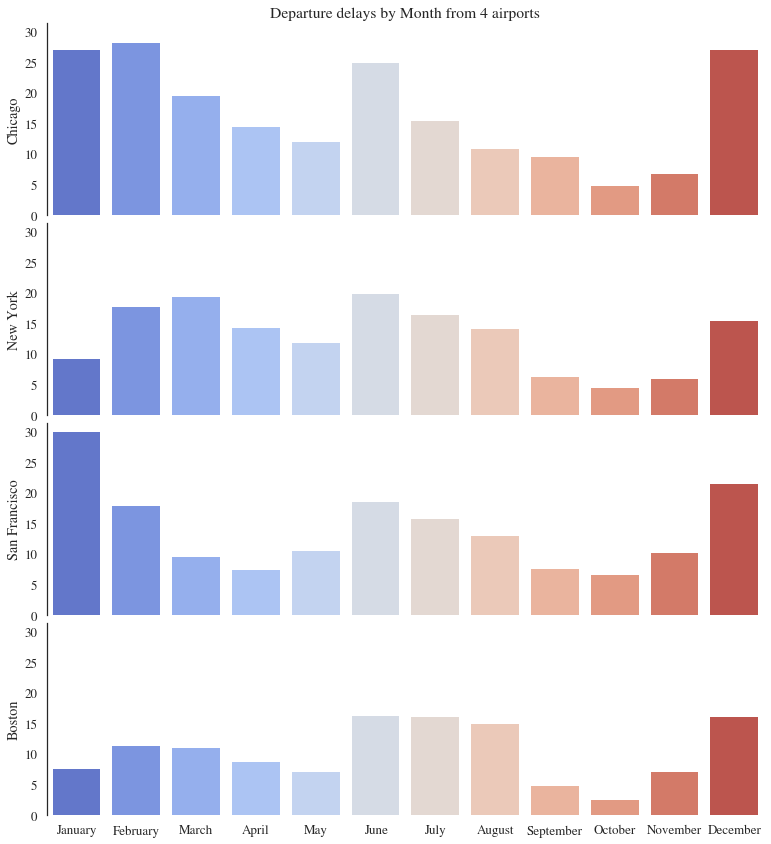

In [32]:
sns.set(style="white", font='StixGeneral', context="talk")
Months = np.array(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
                   'September', 'October', 'November', 'December'])

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(11, 12), sharex=True, sharey=True)
sns.barplot(x=np.arange(len(Months)),y=flt2016ORD[['Month','DepDelay']].groupby('Month').mean().reset_index().DepDelay, 
            ci=None, palette="coolwarm", hline=0, ax=ax1); ax1.set_ylabel('Chicago')
ax1.set_title('Departure delays by Month from 4 airports')
sns.barplot(x=np.arange(len(Months)),y=flt2016LGA[['Month','DepDelay']].groupby('Month').mean().reset_index().DepDelay, 
            ci=None, palette="coolwarm", hline=0, ax=ax2); ax2.set_ylabel('New York')
sns.barplot(x=np.arange(len(Months)),y=flt2016SFO[['Month','DepDelay']].groupby('Month').mean().reset_index().DepDelay, 
            ci=None, palette="coolwarm", hline=0, ax=ax3); ax3.set_ylabel('San Francisco')
sns.barplot(x=np.arange(len(Months)),y=flt2016BOS[['Month','DepDelay']].groupby('Month').mean().reset_index().DepDelay, 
            ci=None, palette="coolwarm", hline=0, ax=ax4); ax4.set_ylabel('Boston')
sns.despine(bottom=True)
plt.setp(f.axes, xticklabels=Months)
plt.tight_layout(h_pad=0)

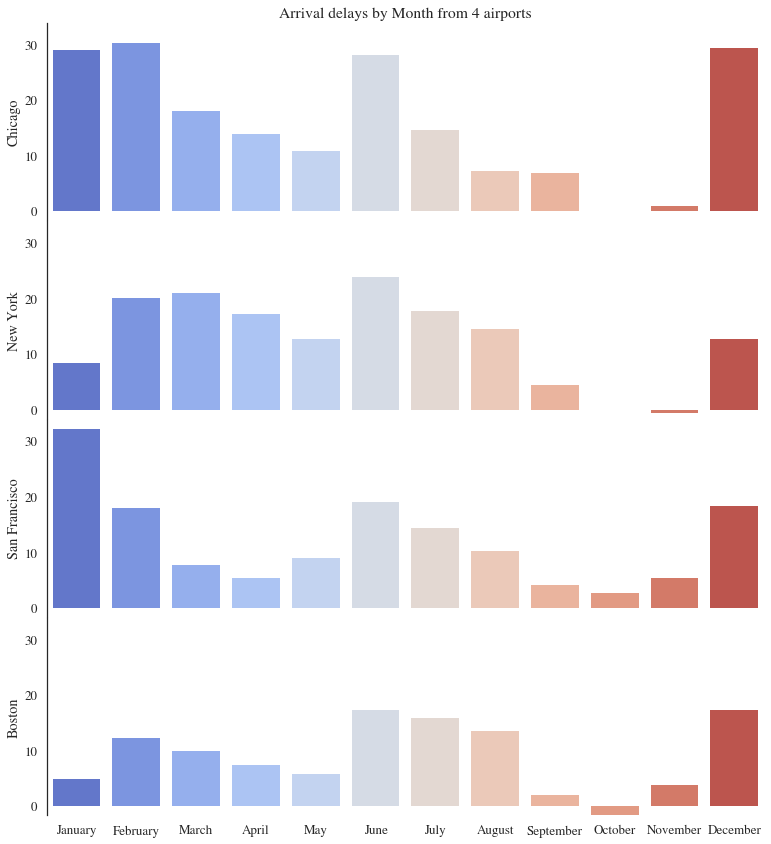

In [33]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(11, 12), sharex=True, sharey=True)
sns.barplot(x=np.arange(len(Months)),y=flt2016ORD[['Month','ArrDelay']].groupby('Month').mean().reset_index().ArrDelay, 
            ci=None, palette="coolwarm", hline=0, ax=ax1); ax1.set_ylabel('Chicago');
ax1.set_title('Arrival delays by Month from 4 airports')
sns.barplot(x=np.arange(len(Months)),y=flt2016LGA[['Month','ArrDelay']].groupby('Month').mean().reset_index().ArrDelay, 
            ci=None, palette="coolwarm", hline=0, ax=ax2); ax2.set_ylabel('New York')
sns.barplot(x=np.arange(len(Months)),y=flt2016SFO[['Month','ArrDelay']].groupby('Month').mean().reset_index().ArrDelay, 
            ci=None, palette="coolwarm", hline=0, ax=ax3); ax3.set_ylabel('San Francisco')
sns.barplot(x=np.arange(len(Months)),y=flt2016BOS[['Month','ArrDelay']].groupby('Month').mean().reset_index().ArrDelay, 
            ci=None, palette="coolwarm", hline=0, ax=ax4); ax4.set_ylabel('Boston')
sns.despine(bottom=True)
plt.setp(f.axes, xticklabels=Months)
plt.tight_layout(h_pad=0)

In [34]:
flt2016ORD['DepHr'] = flt2016ORD['CRSDepTime']//100
flt2016SFO['DepHr'] = flt2016SFO['CRSDepTime']//100
flt2016BOS['DepHr'] = flt2016BOS['CRSDepTime']//100
flt2016LGA['DepHr'] = flt2016LGA['CRSDepTime']//100

C:\Users\antho\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\antho\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\antho\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [35]:
ORD = flt2016ORD[['DepHr','DepDelay']].groupby('DepHr').mean().reset_index()
SFO = flt2016SFO[['DepHr','DepDelay']].groupby('DepHr').mean().reset_index()
BOS = flt2016BOS[['DepHr','DepDelay']].groupby('DepHr').mean().reset_index()
LGA = flt2016LGA[['DepHr','DepDelay']].groupby('DepHr').mean().reset_index()

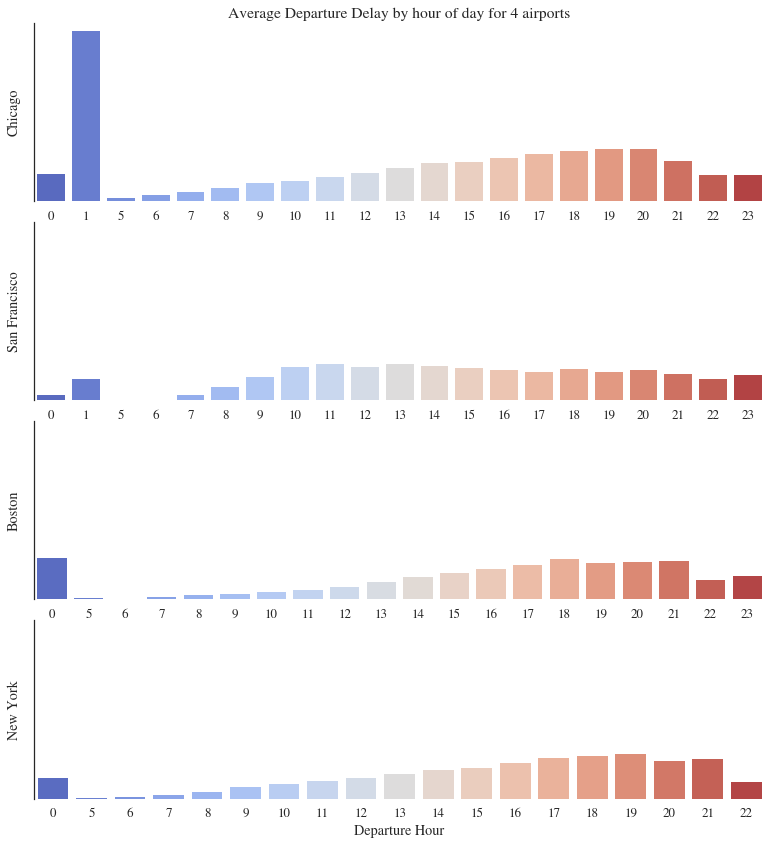

In [36]:
sns.set(style="white", font='StixGeneral', context="talk")
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(11, 12), sharex=False, sharey=True)

sns.barplot(x=ORD.DepHr, y=ORD.DepDelay, ci=None, palette="coolwarm", hline=0, ax=ax1); ax1.set_ylabel('Chicago');
ax1.set_title('Average Departure Delay by hour of day for 4 airports');ax1.set_xlabel('')
sns.barplot(x=SFO.DepHr, y=SFO.DepDelay, ci=None, palette="coolwarm", hline=0, ax=ax2); ax2.set_ylabel('San Francisco')
ax2.set_xlabel('')
sns.barplot(x=BOS.DepHr, y=BOS.DepDelay, ci=None, palette="coolwarm", hline=0, ax=ax3); ax3.set_ylabel('Boston')
ax3.set_xlabel('')
sns.barplot(x=LGA.DepHr, y=LGA.DepDelay, ci=None, palette="coolwarm", hline=0, ax=ax4); ax4.set_ylabel('New York')
ax4.set_xlabel('Departure Hour')

sns.despine(bottom=True)
plt.setp(f.axes,yticklabels='')
plt.tight_layout(h_pad=0)

In [37]:
flt2016ORD['ArrHr'] = flt2016ORD['CRSArrTime']//100
flt2016SFO['ArrHr'] = flt2016SFO['CRSArrTime']//100
flt2016BOS['ArrHr'] = flt2016BOS['CRSArrTime']//100
flt2016LGA['ArrHr'] = flt2016LGA['CRSArrTime']//100

C:\Users\antho\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\antho\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\antho\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [38]:
ORD = flt2016ORD[['ArrHr','ArrDelay']].groupby('ArrHr').mean().reset_index()
SFO = flt2016SFO[['ArrHr','ArrDelay']].groupby('ArrHr').mean().reset_index()
BOS = flt2016BOS[['ArrHr','ArrDelay']].groupby('ArrHr').mean().reset_index()
LGA = flt2016LGA[['ArrHr','ArrDelay']].groupby('ArrHr').mean().reset_index()

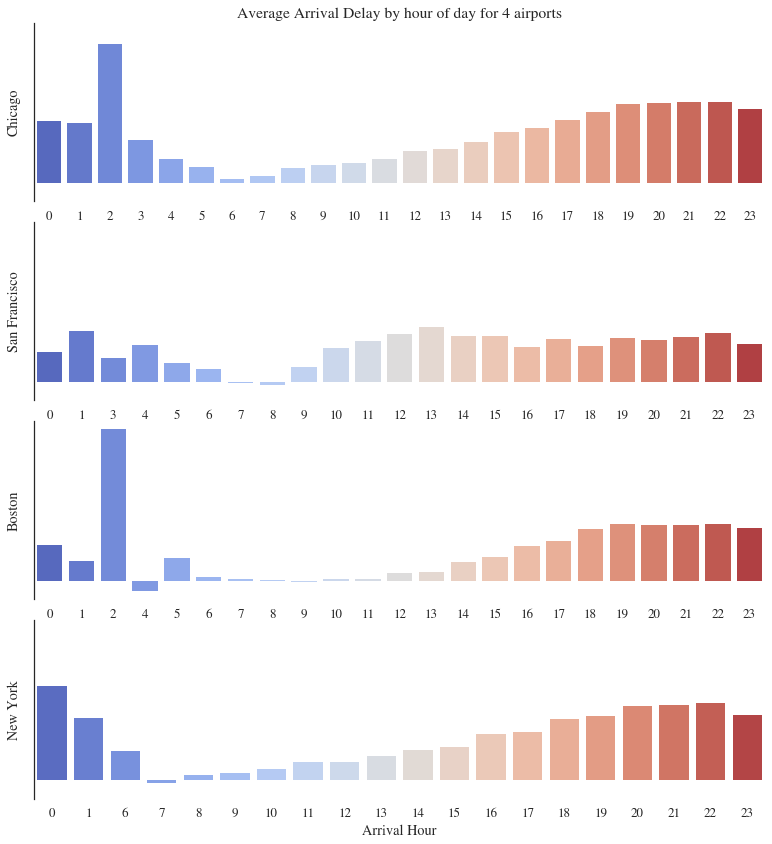

In [39]:
sns.set(style="white", font='StixGeneral', context="talk")
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(11, 12), sharex=False, sharey=True)

sns.barplot(x=ORD.ArrHr, y=ORD.ArrDelay, ci=None, palette="coolwarm", hline=0, ax=ax1); ax1.set_ylabel('Chicago');
ax1.set_title('Average Arrival Delay by hour of day for 4 airports');ax1.set_xlabel('')
sns.barplot(x=SFO.ArrHr, y=SFO.ArrDelay, ci=None, palette="coolwarm", hline=0, ax=ax2); ax2.set_ylabel('San Francisco')
ax2.set_xlabel('')
sns.barplot(x=BOS.ArrHr, y=BOS.ArrDelay, ci=None, palette="coolwarm", hline=0, ax=ax3); ax3.set_ylabel('Boston')
ax3.set_xlabel('')
sns.barplot(x=LGA.ArrHr, y=LGA.ArrDelay, ci=None, palette="coolwarm", hline=0, ax=ax4); ax4.set_ylabel('New York')
ax4.set_xlabel('Arrival Hour')

sns.despine(bottom=True)
plt.setp(f.axes,yticklabels='')
plt.tight_layout(h_pad=0)

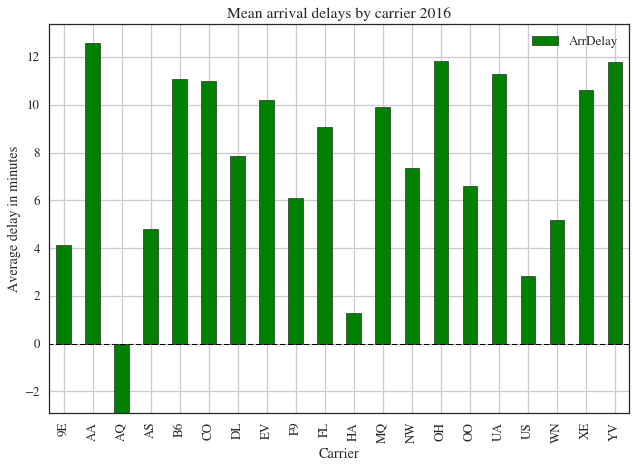

In [40]:
# dont reset index! Need the UniqueCarrier values!
plt.figure(figsize=(20, 11), dpi=300)
flt2016[['UniqueCarrier','ArrDelay']].groupby('UniqueCarrier').mean().plot(kind='bar',edgecolor='black',linewidth=0.5,color='green')
plt.ylabel('Average delay in minutes');plt.xlabel('Carrier');
plt.axhline(y=0, xmin=200, xmax=0, hold=None,color='black',linewidth=1,ls='--');
plt.title('Mean arrival delays by carrier 2016');plt.grid();

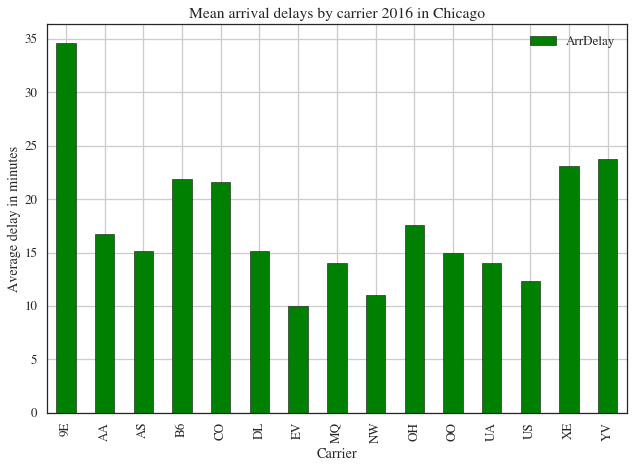

In [41]:
# dont reset index! Need the UniqueCarrier values!
plt.figure(figsize=(20, 11), dpi=300)
flt2016ORD[['UniqueCarrier','ArrDelay']].groupby('UniqueCarrier').mean().plot(kind='bar',edgecolor='black',linewidth=0.5,color='green')
plt.ylabel('Average delay in minutes');plt.xlabel('Carrier');
plt.axhline(y=0, xmin=200, xmax=0, hold=None,color='black',linewidth=1,ls='--');
plt.title('Mean arrival delays by carrier 2016 in Chicago');plt.grid();

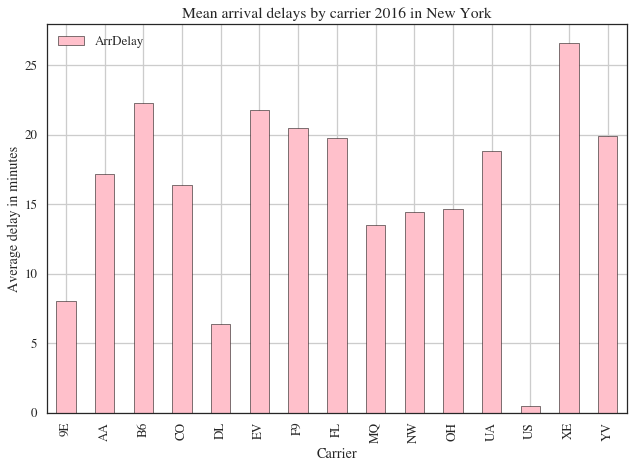

In [42]:
plt.figure(figsize=(20, 11), dpi=300)
flt2016LGA[['UniqueCarrier','ArrDelay']].groupby('UniqueCarrier').mean().plot(kind='bar',edgecolor='black',linewidth=0.5,color='pink')
plt.ylabel('Average delay in minutes');plt.xlabel('Carrier');
plt.axhline(y=0, xmin=200, xmax=0, hold=None,color='black',linewidth=1,ls='--');
plt.title('Mean arrival delays by carrier 2016 in New York');plt.grid();

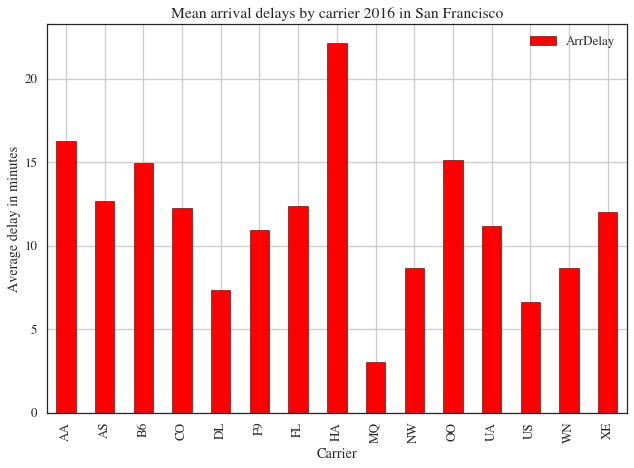

In [43]:
plt.figure(figsize=(20, 11), dpi=300)
flt2016SFO[['UniqueCarrier','ArrDelay']].groupby('UniqueCarrier').mean().plot(kind='bar',edgecolor='black',linewidth=0.5,color='red')
plt.ylabel('Average delay in minutes');plt.xlabel('Carrier');
plt.axhline(y=0, xmin=200, xmax=0, hold=None,color='black',linewidth=1,ls='--');
plt.title('Mean arrival delays by carrier 2016 in San Francisco');plt.grid();

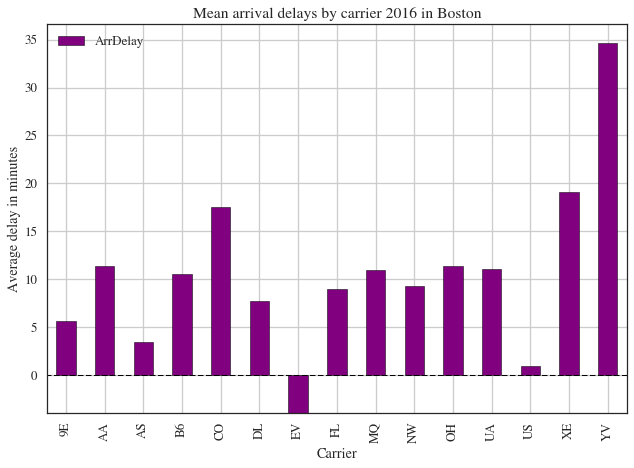

In [44]:
plt.figure(figsize=(20, 11), dpi=300)
flt2016BOS[['UniqueCarrier','ArrDelay']].groupby('UniqueCarrier').mean().plot(kind='bar',edgecolor='black',linewidth=0.5,color='purple')
plt.ylabel('Average delay in minutes');plt.xlabel('Carrier');
plt.axhline(y=0, xmin=200, xmax=0, hold=None,color='black',linewidth=1,ls='--');
plt.title('Mean arrival delays by carrier 2016 in Boston');plt.grid();

## Predictive Model for Flights in Chicago O'hare Airport (ORD)

In [45]:
flt2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6855029 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


We predict whether a flight is on time or delayed. To do this, we use the aviation defintion of late and early departure/arrivals.

* A flight is on-time if the departure delay is within 15 minutes of the scheduled departure time (CRSDepTime).
* A flight is delayed if the departure delay is more than 15 minutes of the schedule departure time (CRSDepTime).

* The features listed below may be of interest for predicting whether a flight is on-time or late:
    * Month
    * Day of Month
    * Day of Week
    * CRSDepTime
    * CRSArrTime
    * Origin (departure airport)
    * Destination (arrival airport)
    * CRSElapsedTime (total flight time)
    * Distance
    * Carrier name

Here, we decide to use a delay threshold of 15 minutes based on standard aviation guidlines. We will use the Origin of Chicago O'hare Airport (ORD). CRSArrTime can be dropped as we have the hour extracted from this feature.

TLDR; We are predicting departure delay (late or on-time)

In [46]:
flt2016['DepHr'] = flt2016['CRSDepTime']//100
flt2016['ArrHr'] = flt2016['CRSArrTime']//100

In [47]:
# import modeling packages

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

C:\Users\antho\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [48]:
# Build feature sets for our analysis
# separate classes based on 15 minute delay
delay_threshold = 15.
# choose direction
direction = 'Origin'

Ycol = 'DepDelay'

if direction == 'Origin':
    # Features for departure delays
    Xcols = ['Month','DayOfWeek','DayofMonth','DepHr','UniqueCarrier','Dest','Distance','CRSElapsedTime']
else:
    # Features for arrival delays
    Xcols = ['Month','DayOfWeek','DayofMonth','ArrHr','UniqueCarrier','Origin','Distance','CRSElapsedTime']
    
scaler = StandardScaler()
X_values = flt2016[flt2016[direction]=='ORD'][Xcols]
Y_values = flt2016[flt2016[direction]=='ORD'][Ycol]

# Change the categorical values of airline names to numbers
X_values['UniqueCarrier'] = pd.factorize(X_values['UniqueCarrier'])[0]

if direction == 'Origin':
    X_values['Dest'] = pd.factorize(X_values['Dest'])[0]
else:
    X_values['Origin'] = pd.factorize(X_values['Origin'])[0]
    

rows = np.random.choice(X_values.index.values, 20000)
sampled_X = X_values.ix[rows]
sampled_Y = Y_values.ix[rows]

TrainX, TestX, TrainY, TestY = train_test_split(
    sampled_X, sampled_Y, test_size=0.50, random_state=0)

TrainX_scl = scaler.fit_transform(TrainX)
TestX_scl = scaler.transform(TestX)


In [49]:
# check for null values
print TestX[pd.isnull(TestX).any(axis=1)].T
print TrainX[pd.isnull(TrainX).any(axis=1)].T

Empty DataFrame
Columns: []
Index: [Month, DayOfWeek, DayofMonth, DepHr, UniqueCarrier, Dest, Distance, CRSElapsedTime]
Empty DataFrame
Columns: []
Index: [Month, DayOfWeek, DayofMonth, DepHr, UniqueCarrier, Dest, Distance, CRSElapsedTime]


In [96]:
#i = np.identity(TrainX.shape[1])
#pca = PCA().fit(TrainX)
#coef = pca.transform(i)
#pd.DataFrame(coef, columns=['PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5', 'PC-6', 'PC-7', 'PC-8'], index=TrainX.columns)

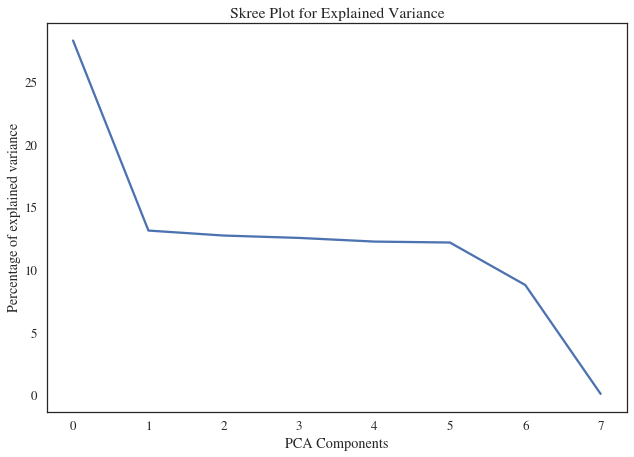

In [81]:
from sklearn.decomposition import PCA, TruncatedSVD
pca = PCA().fit(TrainX_scl, TrainY)

plt.title("Skree Plot for Explained Variance")
plt.ylabel("Percentage of explained variance")
plt.xlabel("PCA Components")
plt.plot(pca.explained_variance_ratio_*100);

In [83]:
pd.DataFrame(coef, columns=['PC-1', 'PC-2'], index=TrainX_scl.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

The 1st Principal Component explains: 28 % of the variance.

The 1st and 2nd Principal Components explain: 41 % of the variance.

The 1st 2nd and 3rd Principal Components explain: 54 % of the variance.

The 1st 2nd 3rd and 4th Principal Components explain: 66 % of the variance.

The 1st 2nd 3rd 4th and 5th Principal Components explain: 78 % of the variance.


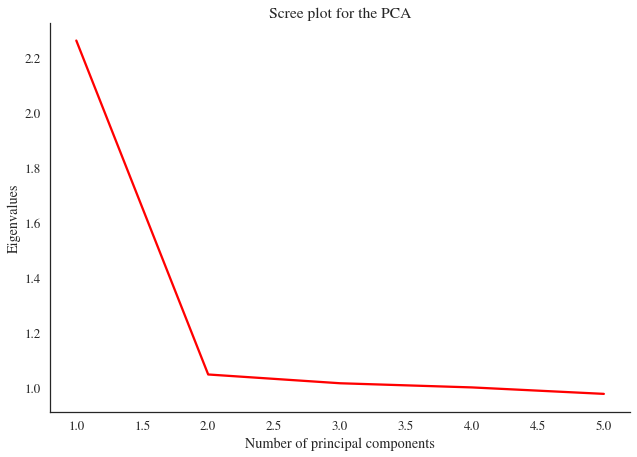

In [71]:
svd = TruncatedSVD(n_components=5)
TrainX_2d = svd.fit_transform(TrainX_scl)

# we make a scree plot to see how many Principal Components to consider
eig = svd.explained_variance_
# and calculate the variance explained by the PC analysis
var_exp = svd.explained_variance_ratio_.cumsum()*100.

plt.plot(np.arange(1,len(eig)+1), eig, color='r')
plt.title('Scree plot for the PCA')
plt.xlabel('Number of principal components')
plt.ylabel('Eigenvalues')
remove_border()

print 'The 1st Principal Component explains:', var_exp[0].astype(int), '% of the variance.'
print ''
print 'The 1st and 2nd Principal Components explain:', var_exp[1].astype(int), '% of the variance.'
print ''
print 'The 1st 2nd and 3rd Principal Components explain:', var_exp[2].astype(int), '% of the variance.'
print ''
print 'The 1st 2nd 3rd and 4th Principal Components explain:', var_exp[3].astype(int), '% of the variance.'
print ''
print 'The 1st 2nd 3rd 4th and 5th Principal Components explain:', var_exp[4].astype(int), '% of the variance.'



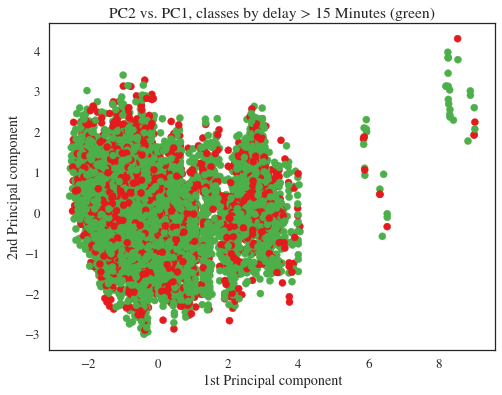

In [77]:
from matplotlib.colors import ListedColormap
cmap_set1 = ListedColormap(['#4daf4a', '#377eb8', '#e41a1c' ])

plt.set_cmap(plt.cm.Paired)
cmap=plt.cm.Paired
Pltcolors = cmap([0,1,2,3,4,5])
plt.figure(figsize=(8, 6))    
plt.scatter(TrainX_2d[:,0], TrainX_2d[:,1], c=(TrainY >= delay_threshold), s = 50, cmap=cmap_set1)
plt.ylabel('2nd Principal component' )
plt.xlabel('1st Principal component' )
plt.title("PC2 vs. PC1, classes by delay > 15 Minutes (green)")